In [182]:
import pycaret
import pandas as pd

In [183]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../export_data/filtered_data_3_best.csv')

In [184]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


# row = data.loc["2023-09-30 07:00:00"]
# row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
                     humidity  pm_10  pm_2_5  pm_2_5_sp  temperature
timestamp                                                           
2023-09-30 07:00:00       NaN    NaN     NaN        NaN          NaN
‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß


In [185]:
data = data[['temperature']]

In [186]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'temperature_lag_{i}'] = data['temperature'].shift(i)


In [187]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

In [188]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)



In [189]:
from pycaret.regression import load_model, predict_model

model_temp = load_model("temp_model_1")

Transformation Pipeline and Model Successfully Loaded


In [190]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_temp

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    for i in range(1,lag_size+1):
        data_compare[f'temperature_lag_{i}'] = data_compare['temperature'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['temperature'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'temperature'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

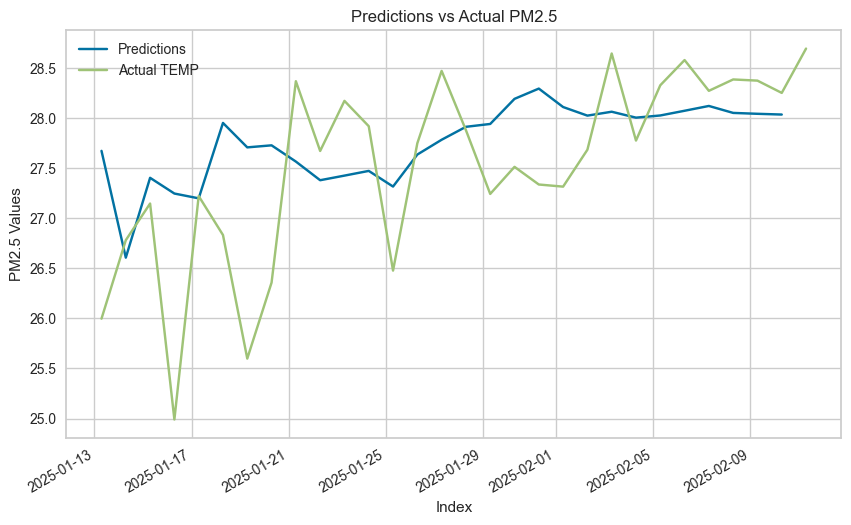

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['temperature']], axis=1)
result_plot.columns = ['Predictions', 'Actual TEMP']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [192]:
y_true = test_data["temperature"][:"2025-2-10"]
y_pred = result["prediction_label"].shift(-1).dropna(axis=0)

In [193]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.1011
Mean Absolute Error (MAE): 0.6574
Root Mean Squared Error (RMSE): 0.8687
Mean Absolute Percentage Error (MAPE): 2.45%
Accuracy: 97.55%


In [194]:
result.tail()

year  month  day  day_of_week  week_of_year  season  \
timestamp                                                                  
2025-02-07 07:00:00  2025      2    7            4             6       0   
2025-02-08 07:00:00  2025      2    8            5             6       0   
2025-02-09 07:00:00  2025      2    9            6             6       0   
2025-02-10 07:00:00  2025      2   10            0             7       0   
2025-02-11 07:00:00  2025      2   11            1             7       0   

                     is_weekend       date  day_of_year  month_sin  month_cos  \
timestamp                                                                       
2025-02-07 07:00:00           0 2025-02-07           38   0.866025        0.5   
2025-02-08 07:00:00           1 2025-02-08           39   0.866025        0.5   
2025-02-09 07:00:00           1 2025-02-09           40   0.866025        0.5   
2025-02-10 07:00:00           0 2025-02-10           41   0.866025        0.5   
2025-02-11 07:00:00           0 2025-02-11           42   0.866025        0.5   

                     day_of_week_sin  day_of_week_cos  temperature_lag_1  \
timestamp                                                                  
2025-02-07 07:00:00        -0.433884        -0.900969          28.025883   
2025-02-08 07:00:00        -0.974928        -0.222521          28.073009   
2025-02-09 07:00:00        -0.781832         0.623490          28.120989   
2025-02-10 07:00:00         0.000000         1.000000          28.051504   
2025-02-11 07:00:00         0.781832         0.623490          28.042645   

                     temperature_lag_2  temperature_lag_3  temperature_lag_4  \
timestamp                                                                      
2025-02-07 07:00:00          28.004192          28.063253          28.024374   
2025-02-08 07:00:00          28.025883          28.004192          28.063253   
2025-02-09 07:00:00          28.073009          28.025883          28.004192   
2025-02-10 07:00:00          28.120989          28.073009          28.025883   
2025-02-11 07:00:00          28.051504          28.120989          28.073009   

                     temperature_lag_5  temperature_lag_6  temperature_lag_7  \
timestamp                                                                      
2025-02-07 07:00:00          28.110226          28.294271          28.191843   
2025-02-08 07:00:00          28.024374          28.110226          28.294271   
2025-02-09 07:00:00          28.063253          28.024374          28.110226   
2025-02-10 07:00:00          28.004192          28.063253          28.024374   
2025-02-11 07:00:00          28.025883          28.004192          28.063253   

                     prediction_label  
timestamp                              
2025-02-07 07:00:00         28.073009  
2025-02-08 07:00:00         28.120989  
2025-02-09 07:00:00         28.051503  
2025-02-10 07:00:00         28.042644  
2025-02-11 07:00:00         28.035151

------------------

In [195]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../export_data/export-pm25_eng-1d.csv')

In [196]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

In [197]:
data.tail()

Unnamed: 0      timezone   humidity      pm_10  \
timestamp                                                             
2025-02-07 07:00:00       657.0  Asia/Bangkok  70.933952  34.743259   
2025-02-08 07:00:00       658.0  Asia/Bangkok  69.348548  30.654249   
2025-02-09 07:00:00       659.0  Asia/Bangkok  69.916384  28.971065   
2025-02-10 07:00:00       660.0  Asia/Bangkok  71.226336  30.652667   
2025-02-11 07:00:00       661.0  Asia/Bangkok  68.159624  32.532955   

                        pm_2_5  pm_2_5_sp  temperature  
timestamp                                               
2025-02-07 07:00:00  29.321219  26.166471    28.271927  
2025-02-08 07:00:00  26.000000  22.380675    28.385596  
2025-02-09 07:00:00  24.616898  20.976852    28.373742  
2025-02-10 07:00:00  25.856981  22.374574    28.251201  
2025-02-11 07:00:00  27.522727  24.120455    28.693799

In [198]:
# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


row = data.loc["2023-09-30 07:00:00"]
row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
                     Unnamed: 0 timezone  humidity  pm_10  pm_2_5  pm_2_5_sp  \
timestamp                                                                      
2023-04-02 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-15 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-16 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-17 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-18 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-19 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-20 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-21 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-22 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-23 07:00:00         NaN      NaN      

Unnamed: 0            165.0
timezone       Asia/Bangkok
humidity          86.678155
pm_10             82.662011
pm_2_5            67.011173
pm_2_5_sp         97.072626
temperature       28.610736
Name: 2023-09-30 07:00:00, dtype: object

In [199]:
# add temp predict column
shifted_predictions_temp = result['prediction_label'].shift(-1).iloc[:-1]

data.loc[shifted_predictions_temp.index, 'temperature'] = shifted_predictions_temp
data.tail(30)

Unnamed: 0      timezone   humidity      pm_10  \
timestamp                                                             
2025-01-13 07:00:00       632.0  Asia/Bangkok  78.292202  48.632215   
2025-01-14 07:00:00       633.0  Asia/Bangkok  74.887204  58.218182   
2025-01-15 07:00:00       634.0  Asia/Bangkok  74.201402  46.750000   
2025-01-16 07:00:00       635.0  Asia/Bangkok  89.873425  51.154312   
2025-01-17 07:00:00       636.0  Asia/Bangkok  80.848939  17.509220   
2025-01-18 07:00:00       637.0  Asia/Bangkok  83.512677  20.454545   
2025-01-19 07:00:00       638.0  Asia/Bangkok  85.338095  35.741685   
2025-01-20 07:00:00       639.0  Asia/Bangkok  84.719634  44.953250   
2025-01-21 07:00:00       640.0  Asia/Bangkok  72.150981  25.172840   
2025-01-22 07:00:00       641.0  Asia/Bangkok  75.599793  35.329412   
2025-01-23 07:00:00       642.0  Asia/Bangkok  73.888731  44.607143   
2025-01-24 07:00:00       643.0  Asia/Bangkok  76.517296  45.566921   
2025-01-25 07:00:00       644.0  Asia/Bangkok  86.927369  17.649123   
2025-01-26 07:00:00       645.0  Asia/Bangkok  79.552613  34.579310   
2025-01-27 07:00:00       646.0  Asia/Bangkok  76.490067  19.396667   
2025-01-28 07:00:00       647.0  Asia/Bangkok  73.238003  26.330700   
2025-01-29 07:00:00       648.0  Asia/Bangkok  75.608102  27.842045   
2025-01-30 07:00:00       649.0  Asia/Bangkok  71.167674  31.124429   
2025-01-31 07:00:00       650.0  Asia/Bangkok  68.520368  28.628702   
2025-02-01 07:00:00       651.0  Asia/Bangkok  69.231031  36.793578   
2025-02-02 07:00:00       652.0  Asia/Bangkok  70.341639  37.697595   
2025-02-03 07:00:00       653.0  Asia/Bangkok  65.114261  39.898058   
2025-02-04 07:00:00       654.0  Asia/Bangkok  70.266522  28.523077   
2025-02-05 07:00:00       655.0  Asia/Bangkok  71.500943  16.699531   
2025-02-06 07:00:00       656.0  Asia/Bangkok  69.511783  23.709261   
2025-02-07 07:00:00       657.0  Asia/Bangkok  70.933952  34.743259   
2025-02-08 07:00:00       658.0  Asia/Bangkok  69.348548  30.654249   
2025-02-09 07:00:00       659.0  Asia/Bangkok  69.916384  28.971065   
2025-02-10 07:00:00       660.0  Asia/Bangkok  71.226336  30.652667   
2025-02-11 07:00:00       661.0  Asia/Bangkok  68.159624  32.532955   

                        pm_2_5  pm_2_5_sp  temperature  
timestamp                                               
2025-01-13 07:00:00  42.594631  47.726174    27.672643  
2025-01-14 07:00:00  51.460606  67.738182    26.606611  
2025-01-15 07:00:00  42.430233  45.204651    27.403461  
2025-01-16 07:00:00  45.747352  60.757943    27.246544  
2025-01-17 07:00:00  14.060993  10.900709    27.198546  
2025-01-18 07:00:00  16.223140  12.652893    27.951422  
2025-01-19 07:00:00  31.798226  30.738359    27.707440  
2025-01-20 07:00:00  40.245154  41.101482    27.727781  
2025-01-21 07:00:00  21.406285  17.993266    27.565697  
2025-01-22 07:00:00  30.311765  27.448235    27.379506  
2025-01-23 07:00:00  39.527902  39.938616    27.425465  
2025-01-24 07:00:00  40.677911  42.080522    27.472515  
2025-01-25 07:00:00  15.038596  11.622222    27.316284  
2025-01-26 07:00:00  29.743678  27.216092    27.635903  
2025-01-27 07:00:00  16.447778  13.004444    27.783518  
2025-01-28 07:00:00  21.580135  17.983070    27.912746  
2025-01-29 07:00:00  22.697727  18.945455    27.941236  
2025-01-30 07:00:00  26.160959  22.826484    28.191843  
2025-01-31 07:00:00  24.003417  20.370159    28.294272  
2025-02-01 07:00:00  31.669725  29.267202    28.110225  
2025-02-02 07:00:00  32.655212  30.528064    28.024374  
2025-02-03 07:00:00  35.094660  33.734223    28.063253  
2025-02-04 07:00:00  24.459172  21.000000    28.004192  
2025-02-05 07:00:00  13.987089  10.823944    28.025884  
2025-02-06 07:00:00  19.454865  15.794842    28.073009  
2025-02-07 07:00:00  29.321219  26.166471    28.120989  
2025-02-08 07:00:00  26.000000  22.380675    28.051503  
2025-02-09 07:00:00  24.616898  20.976852    28.042644  
2025-02-10 07:00:00  25.856981  22.374

In [200]:
data = data[['humidity', 'temperature']]

In [201]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

In [202]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [203]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [204]:
import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
# data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
# data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
# data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
# data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'humidity_lag_{i}'] = data['humidity'].shift(i)

for i in range(1,lag_size+1):
    data[f'temperature_lag_{i}'] = data['temperature'].shift(i)

In [205]:
# data["temp_diff"] = data["temperature"].diff()

In [206]:
data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [207]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

<Axes: xlabel='timestamp'>

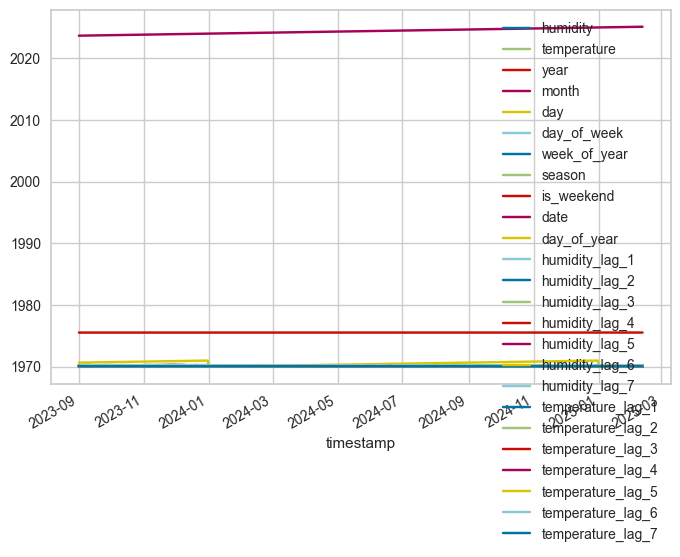

In [208]:
data_filtered.plot()

In [209]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data
test_size

0.05660377358490566

In [210]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [211]:
train_data.shape

(500, 25)

In [212]:
test_data.shape

(30, 25)

In [213]:
test_data.head(1)

humidity  temperature  year  month  day  day_of_week  \
timestamp                                                                    
2025-01-13 07:00:00  78.292202    27.672643  2025      1   13            0   

                     week_of_year  season  is_weekend       date  day_of_year  \
timestamp                                                                       
2025-01-13 07:00:00             3       2           0 2025-01-13           13   

                     humidity_lag_1  humidity_lag_2  humidity_lag_3  \
timestamp                                                             
2025-01-13 07:00:00       85.379806       73.568381       70.491487   

                     humidity_lag_4  humidity_lag_5  humidity_lag_6  \
timestamp                                                             
2025-01-13 07:00:00       70.983573       71.168637       70.630299   

                     humidity_lag_7  temperature_lag_1  temperature_lag_2  \
timestamp                                                                   
2025-01-13 07:00:00       72.844643          25.434972          28.357459   

                     temperature_lag_3  temperature_lag_4  temperature_lag_5  \
timestamp                                                                      
2025-01-13 07:00:00          28.945704          28.383165          28.921543   

                     temperature_lag_6  temperature_lag_7  
timestamp                                                  
2025-01-13 07:00:00          29.145097          28.825509

In [214]:
test_data.tail(1)

humidity  temperature  year  month  day  day_of_week  \
timestamp                                                                    
2025-02-11 07:00:00  68.159624    28.693799  2025      2   11            1   

                     week_of_year  season  is_weekend       date  day_of_year  \
timestamp                                                                       
2025-02-11 07:00:00             7       0           0 2025-02-11           42   

                     humidity_lag_1  humidity_lag_2  humidity_lag_3  \
timestamp                                                             
2025-02-11 07:00:00       71.226336       69.916384       69.348548   

                     humidity_lag_4  humidity_lag_5  humidity_lag_6  \
timestamp                                                             
2025-02-11 07:00:00       70.933952       69.511783       71.500943   

                     humidity_lag_7  temperature_lag_1  temperature_lag_2  \
timestamp                                                                   
2025-02-11 07:00:00       70.266522          28.035151          28.042644   

                     temperature_lag_3  temperature_lag_4  temperature_lag_5  \
timestamp                                                                      
2025-02-11 07:00:00          28.051503          28.120989          28.073009   

                     temperature_lag_6  temperature_lag_7  
timestamp                                                  
2025-02-11 07:00:00          28.025884          28.004192

In [215]:
test_data.columns

Index(['humidity', 'temperature', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'season', 'is_weekend', 'date', 'day_of_year',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4',
       'humidity_lag_5', 'humidity_lag_6', 'humidity_lag_7',
       'temperature_lag_1', 'temperature_lag_2', 'temperature_lag_3',
       'temperature_lag_4', 'temperature_lag_5', 'temperature_lag_6',
       'temperature_lag_7'],
      dtype='object')

In [216]:
# from pycaret.time_series import *
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='humidity', session_id=123, fold=12, iterative_imputation_iters=100, remove_outliers = True)
# iterative_imputation_iters=100, remove_outliers = True

In [217]:
# compare baseline models
best = exp1.compare_models(n_select=15)

In [218]:
# model_1 = exp1.create_model('rf')
model_1 = exp1.create_model('rf')
model_2 = exp1.create_model('ridge')
model_3 = exp1.create_model('br')

In [219]:
# exp1.evaluate_model(model_1)

In [220]:
predictions = exp1.predict_model(model_2, data=test_data)
predict_v = predictions['prediction_label']
real = test_data['humidity']

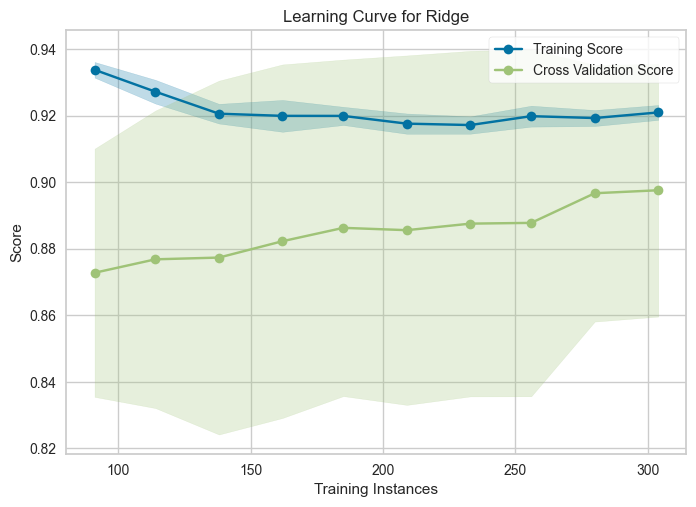

In [221]:
exp1.plot_model(model_2, 'learning')

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 1 ‡∏ß‡∏±‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏ú‡∏∑‡πà‡∏≠ 2 ‡∏ß‡∏±‡∏ô

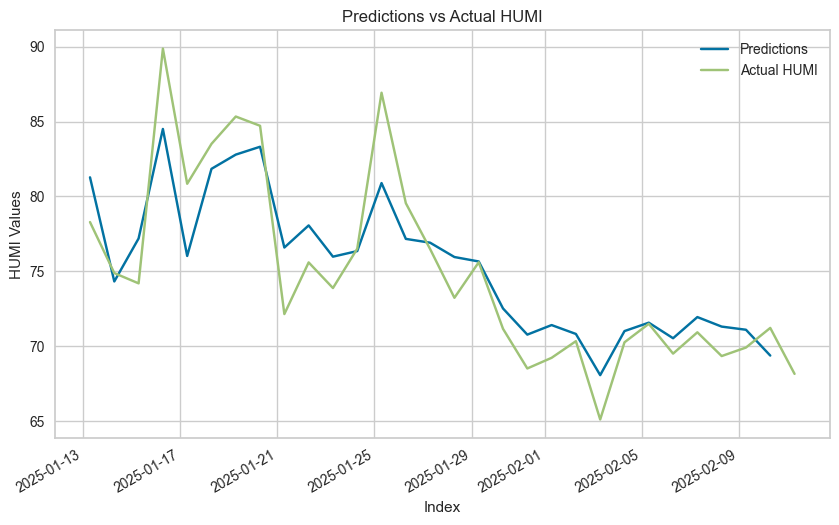

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result = pd.concat([predict_v.shift(-1), test_data['humidity']], axis=1)
result.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [223]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R¬≤ Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R¬≤ Score: 0.8216
Mean Absolute Error (MAE): 2.0768
Root Mean Squared Error (RMSE): 2.5821
Accuracy: 97.24%


In [224]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.8216
Mean Absolute Error (MAE): 2.0768
Root Mean Squared Error (RMSE): 2.5821
Mean Absolute Percentage Error (MAPE): 2.71%
Accuracy: 97.29%


# Predict 1 by 1

30 ‡∏ß‡∏±‡∏ô  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 ‡∏ß‡∏±‡∏ô  
2025-02-05  
2025-02-11  
24 ‡∏ß‡∏±‡∏ô  
2025-01-19 07:00:00  
31 ‡∏ß‡∏±‡∏ô
2025-01-12 07:00:00

In [225]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_3

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå rolling average (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà)

    # data_compare['pm_2_5_rolling_7'] = data_compare['pm_2_5'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

    for i in range(1,lag_size+1):
        data_compare[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['humidity'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'humidity'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

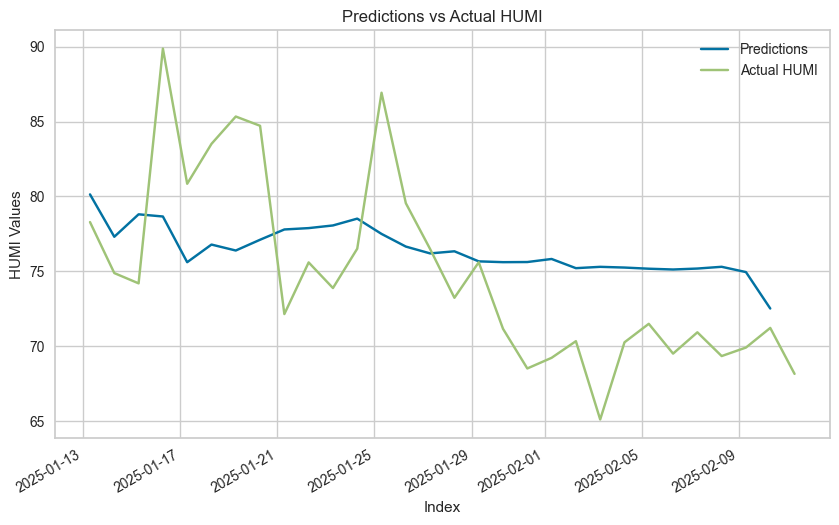

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['humidity']], axis=1)
result_plot.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [227]:
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = result['prediction_label'].shift(-1).dropna(axis=0)

In [228]:
# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.1471
Mean Absolute Error (MAE): 4.9152
Root Mean Squared Error (RMSE): 5.6453
Mean Absolute Percentage Error (MAPE): 6.53%
Accuracy: 93.47%


In [229]:
exp1.save_model(model_1, "humi_use_temp_model_2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['temperature', 'year', 'month',
                                              'day', 'day_of_week',
                                              'week_of_year', 'season',
                                              'is_weekend', 'day_of_year',
                                              'humidity_lag_1', 'humidity_lag_2',
                                              'humidity_lag_3', 'hu...
                                              'temperature_lag_5',
                                              'temperature_lag_6',
                                              'temperature_lag_7'],
                                     transformer=SimpleImputer())),
                 ('categoric

In [230]:
stop

NameError: name 'stop' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡πÅ‡∏õ‡∏•‡∏á index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å
x = data_filtered.copy()
x.index = pd.to_datetime(x.index).normalize()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
result_dict = {}

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏à‡∏≤‡∏Å best_list
model_names = {model.__class__.__name__: model for model in best}

start_date = "2025-01-13"
end_date = "2025-02-11"

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, model in model_names.items():
    print(f"Processing model: {model_name}")

    data_compare = x.loc[:'2025-01-12'].copy()  # ‡πÉ‡∏ä‡πâ copy() ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô Warning
    result = pd.DataFrame()

    for date in pd.date_range(start=start_date, end=end_date, freq="D"):
        # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        date = pd.to_datetime(date).normalize()  # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ date

        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÉ‡∏ô x ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        if date not in x.index:
            print(f"‚ö†Ô∏è Warning: Date {date} not found in x index.")
            continue

        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
        test_1 = x.loc[[date]].copy()

        # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
        data_compare = pd.concat([data_compare, test_1], axis=0)

        # ‡πÄ‡∏û‡∏¥‡πà‡∏° lag feature
        for i in range(1, lag_size + 1):
            test_1[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i).iloc[-1]

        # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
        test_1 = test_1.dropna()

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤
        predict_test_1 = exp1.predict_model(model, data=test_1)

        # ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï data_compare
        predict_test_1.index = [date]  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î index ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        data_compare.loc[date, 'humidity'] = predict_test_1['prediction_label'].values[0]

        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        result = pd.concat([result, predict_test_1], axis=0)

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡∏•‡∏á dict
    result_dict[model_name] = result

# --------------------------------------------
# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# --------------------------------------------
real_data = x.loc[start_date:end_date]

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, result in result_dict.items():
    plt.figure(figsize=(12, 6))
    
    result_plot = pd.concat([result['prediction_label'], real_data['humidity']], axis=1)
    result_plot.columns = ['Predictions', 'Actual TEMP']

    plt.plot(result_plot.index, result_plot['Predictions'], label=f"Predicted ({model_name})")
    plt.plot(real_data.index, real_data['humidity'], label="Actual TEMP", color="black", linewidth=2)
    
    # ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏£‡∏≤‡∏ü
    plt.title(f'Predictions vs Actual TEMP for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('TEMP Values')
    plt.legend()

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
    plt.show()

Processing model: BayesianRidge


Processing model: Ridge


KeyboardInterrupt: 

In [ ]:
# --------------------------------------------
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Regression Metrics (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü)
# --------------------------------------------
for model_name, result in result_dict.items():
    y_true = x.loc[start_date:end_date, 'humidity']  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
    y_pred = result['prediction_label']

    # ‡∏•‡∏ö NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
    valid_idx = y_pred.dropna().index
    y_true = y_true.loc[valid_idx]
    y_pred = y_pred.loc[valid_idx]

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô Accuracy %

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ Metrics ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print("\nüìä Model Performance Metrics:")
    print(f"Model: {model_name}")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 50)


üìä Model Performance Metrics:
Model: BayesianRidge
R¬≤ Score: 0.1736
Mean Absolute Error (MAE): 4.9005
Root Mean Squared Error (RMSE): 5.5809
Mean Absolute Percentage Error (MAPE): 6.54%
Accuracy: 93.46%
--------------------------------------------------

üìä Model Performance Metrics:
Model: Ridge
R¬≤ Score: 0.1961
Mean Absolute Error (MAE): 4.7908
Root Mean Squared Error (RMSE): 5.5041
Mean Absolute Percentage Error (MAPE): 6.38%
Accuracy: 93.62%
--------------------------------------------------

üìä Model Performance Metrics:
Model: LinearRegression
R¬≤ Score: 0.1999
Mean Absolute Error (MAE): 4.7834
Root Mean Squared Error (RMSE): 5.4911
Mean Absolute Percentage Error (MAPE): 6.37%
Accuracy: 93.63%
--------------------------------------------------

üìä Model Performance Metrics:
Model: ExtraTreesRegressor
R¬≤ Score: -1.4770
Mean Absolute Error (MAE): 8.8052
Root Mean Squared Error (RMSE): 9.6618
Mean Absolute Percentage Error (MAPE): 12.22%
Accuracy: 87.78%
----------------